In [1]:
import seaborn as sns
from sklearn.metrics import roc_auc_score

from make_data import *
from make_model import *
from model import *

In [2]:
d = from_excel('dataset.xlsx')

/home/impuling/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/impuling/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/impuling/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


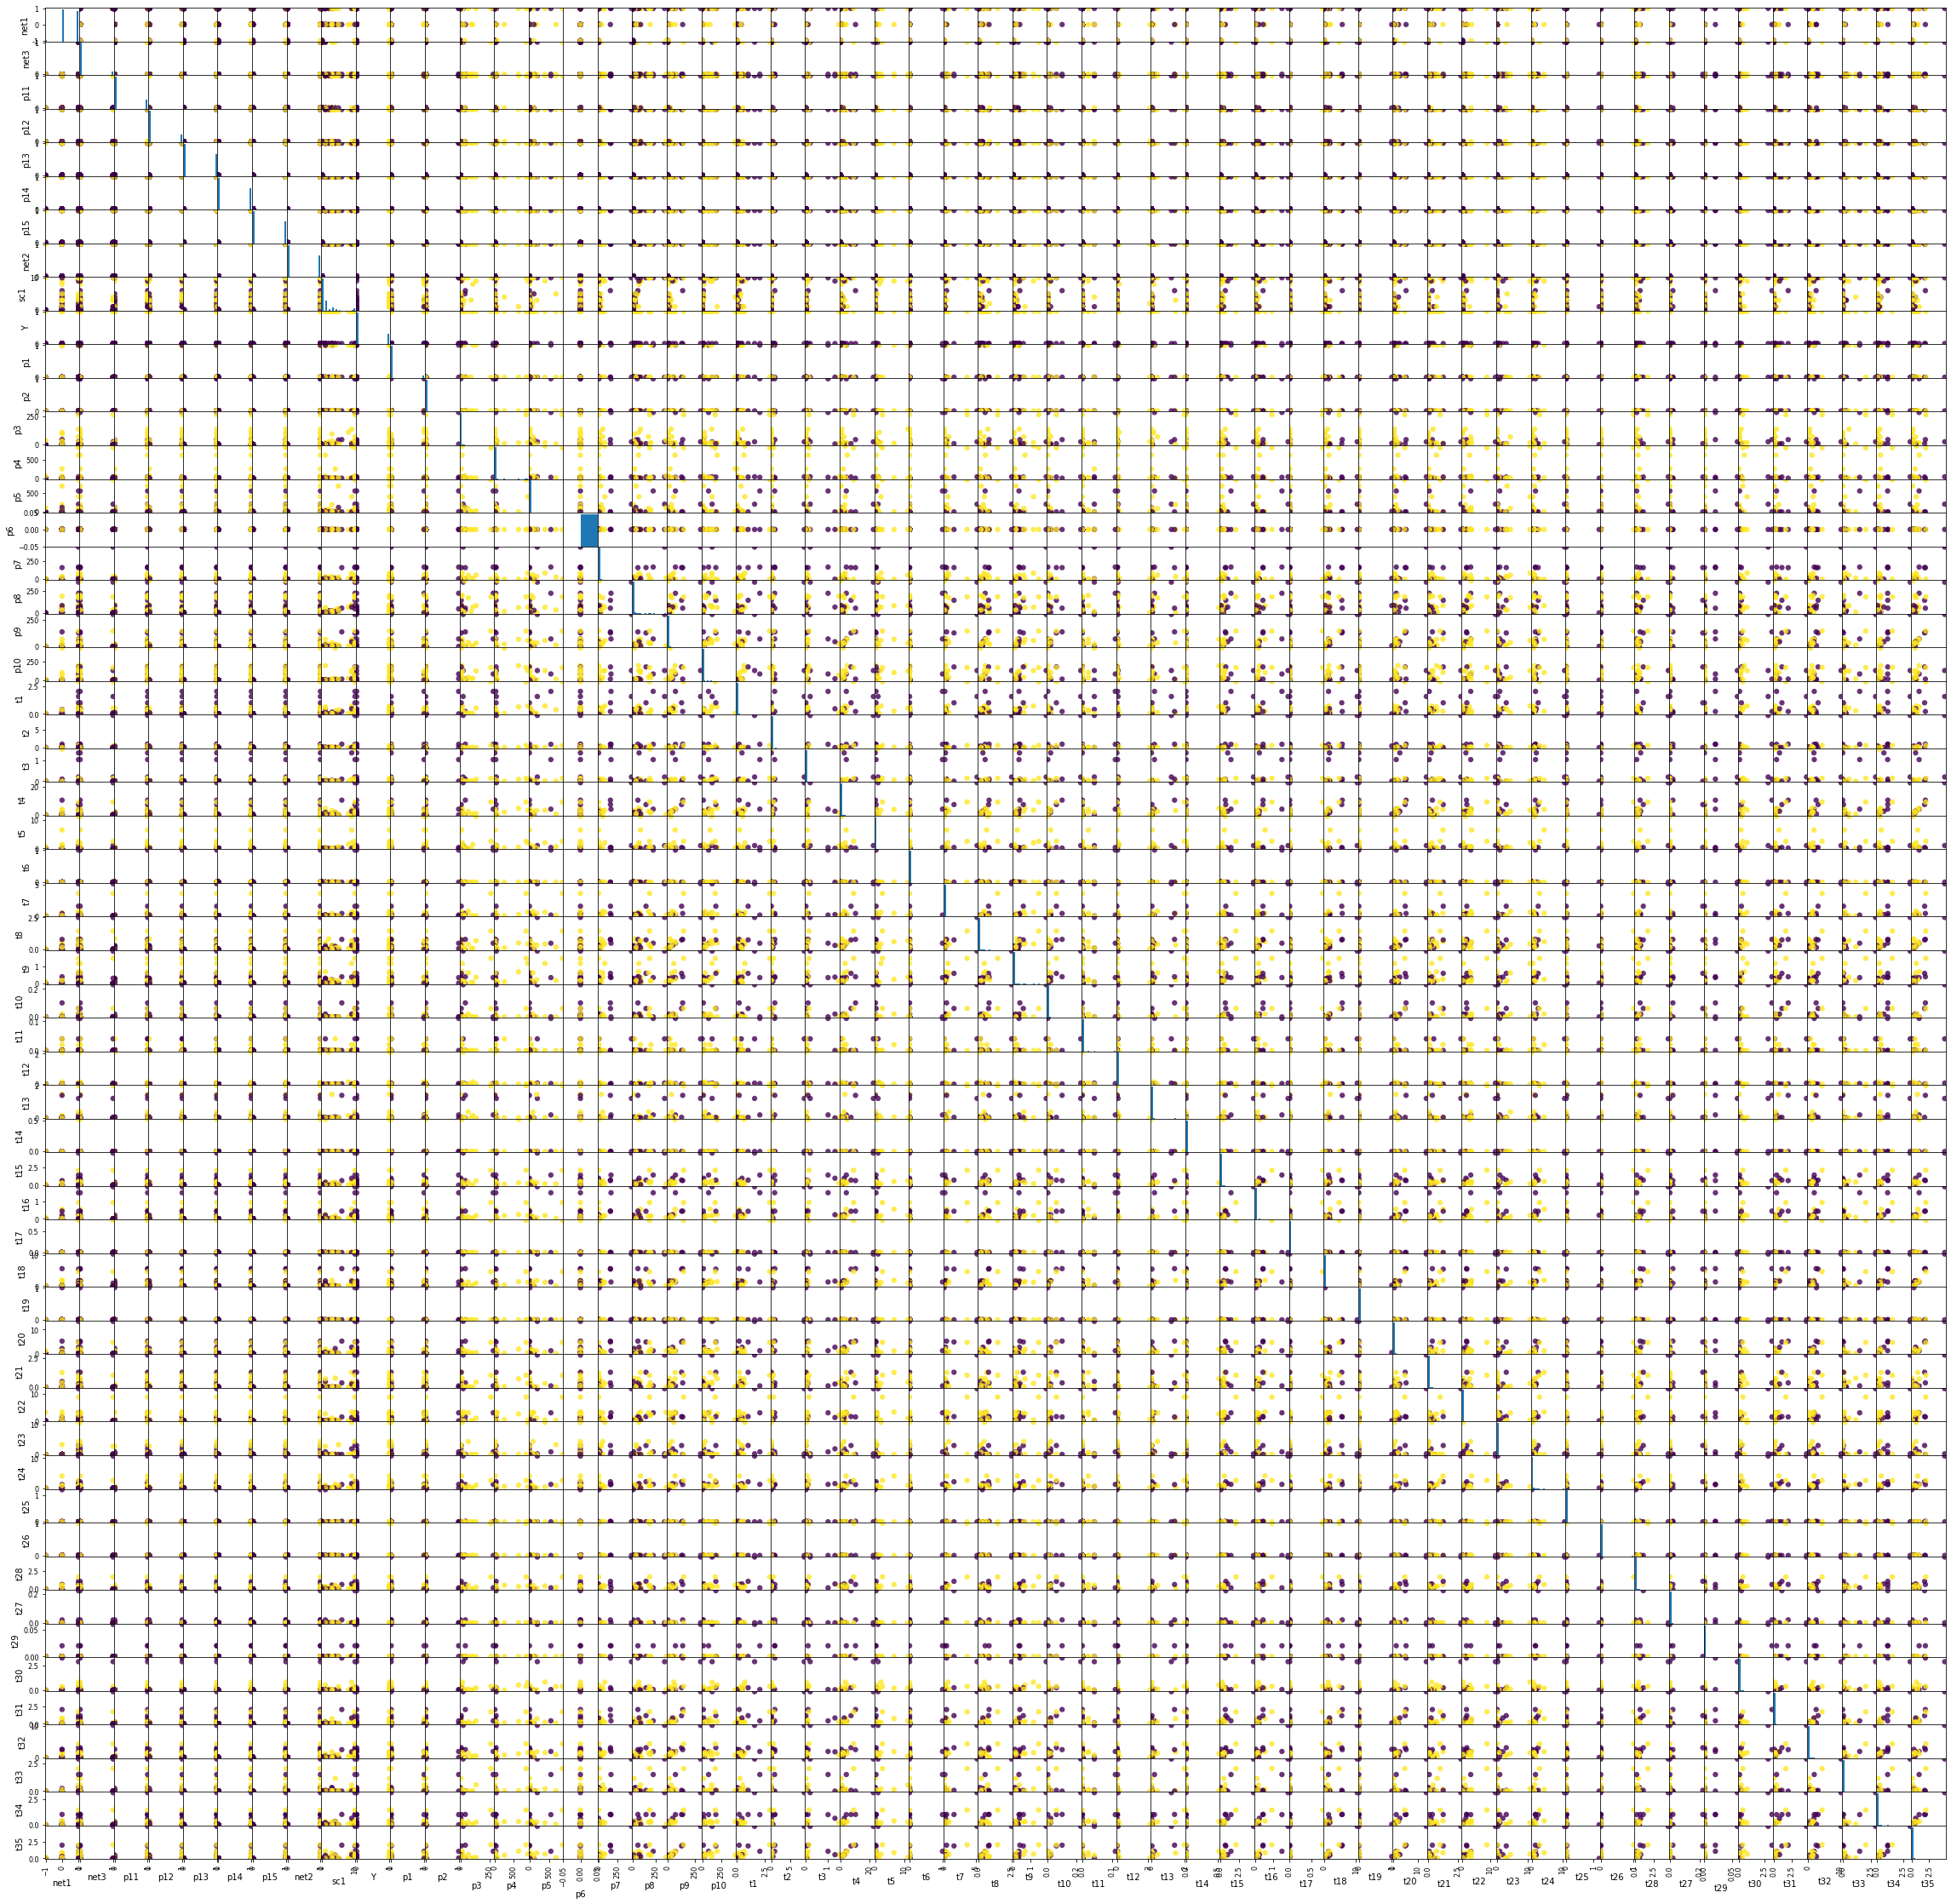

In [3]:
scat_mtrx = pd.plotting.scatter_matrix(d, c=d['Y'], figsize=(40, 40), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=0.8)

In [4]:
features, target = make_data(d, 'Y')
features = make_feature(features, target)

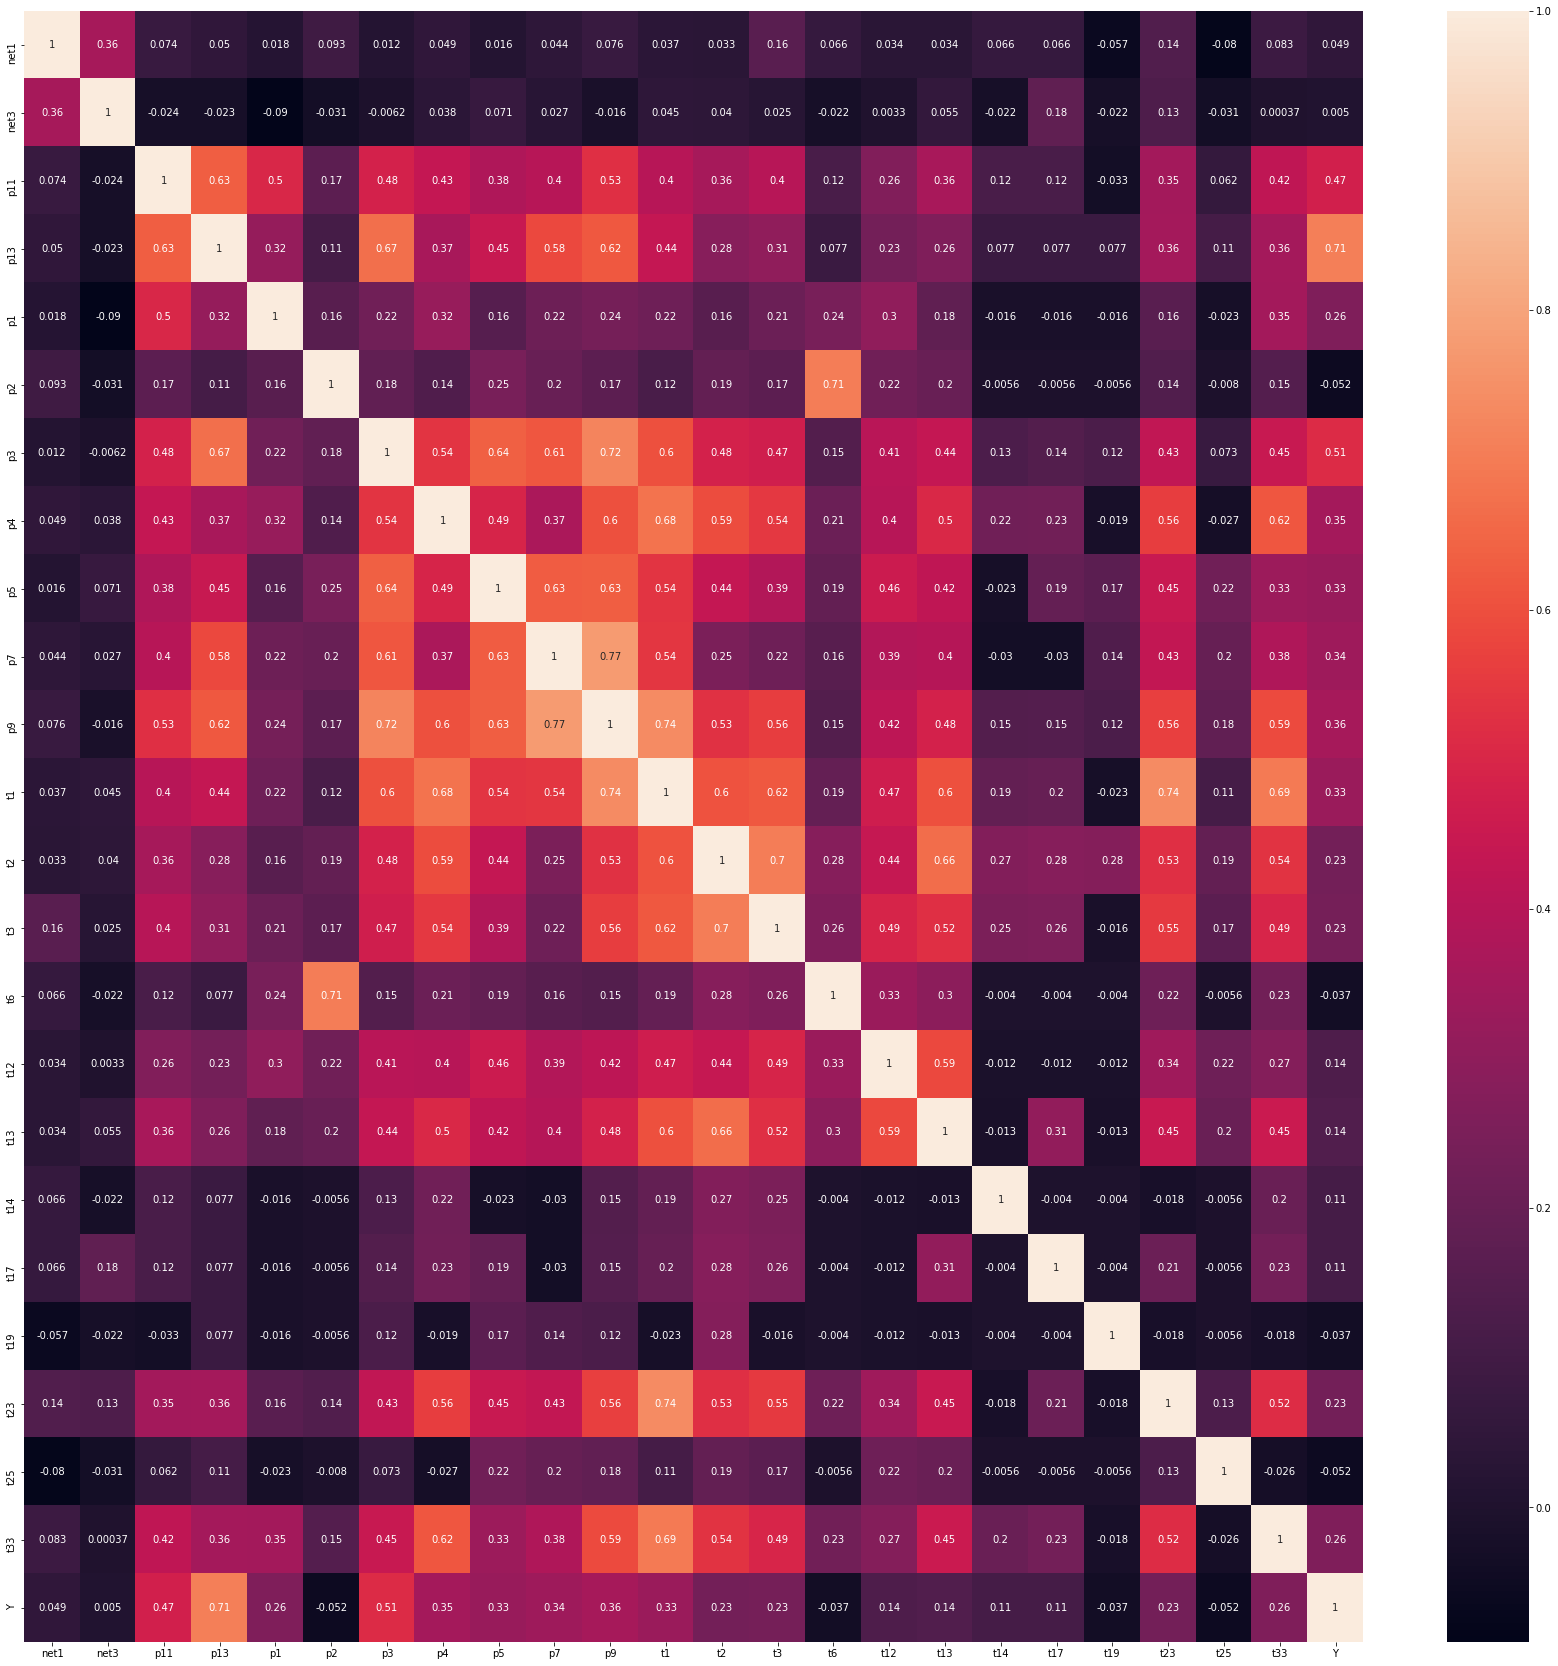

In [5]:
data = pd.concat([features, target], axis=1, sort=False)
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(data.corr(method='spearman'), annot=True)

Classification report:               precision    recall  f1-score   support

         0.0       0.91      0.91      0.91        45
         1.0       0.79      0.79      0.79        19

    accuracy                           0.88        64
   macro avg       0.85      0.85      0.85        64
weighted avg       0.88      0.88      0.88        64



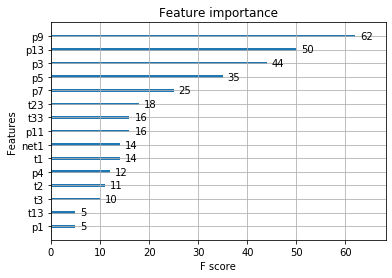

In [6]:
select_best_features(features, target)

In [7]:
best_features = ['p9', 'p13', 'p3', 'p5', 'p7']

In [8]:
features_train, features_test, target_train, target_test = train_test_split(features[best_features], 
                                                                            target,
                                                                            test_size=.25,
                                                                            random_state=21)

Чтобы проверить скоры моделей и понять, какая из них лучше, можно применить критерий Стьюдента для связанных выборок. Проверим, можем ли мы это сделать для данного случая: проверим гипотезу нормальности распределения. Для нормальности необходимо, чтобы числитель был распределен нормально, знаменатель - по критерию Хи-квадрат.

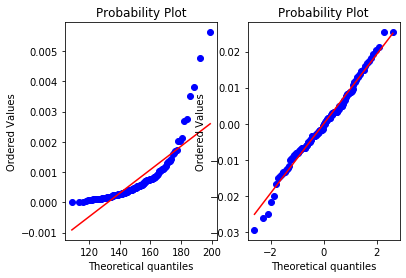

In [9]:
m, S = check_norm_dist(features_train, target_train, [10, 20])

Как видно по графикам, критерий нормальности для знаменателя не выполняется, поэтому будем выбирать лучшую модель по средним скорам, полученным на кросс-валидации.

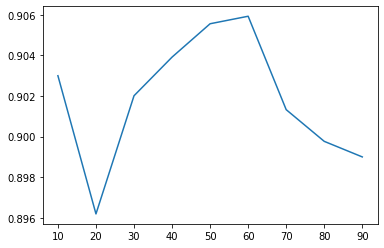

In [10]:
select_best_estimator(features_train, target_train,)

In [11]:
n_estimators = 60

In [12]:
model = make_model(features_train, target_train, n_estimators)

In [13]:
predictions = model.predict(features_test)

In [14]:
report = classification_report(target_test, predictions)
auc = roc_auc_score(target_test, predictions)

print(f'AUC: {auc}')
print(f'Classification report: {report}')

AUC: 0.9251461988304095
Classification report:               precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        45
         1.0       0.89      0.89      0.89        19

    accuracy                           0.94        64
   macro avg       0.93      0.93      0.93        64
weighted avg       0.94      0.94      0.94        64

